In [1]:
import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from plotly.subplots import make_subplots

In [2]:
from ipywidgets import interact, Dropdown
import plotly.graph_objs as go
import plotly.subplots as sp


In [3]:
from sklearn.model_selection import cross_val_score, GridSearchCV, validation_curve
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [1]:
from mymodule import check_df, find_categorical_columns, binary_columns_find

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('datasets/df_test.csv')


In [7]:
df.head()

,OverallQual,GarageCars,TotRmsAbvGrd,GrLivArea,RoofMatl,BsmtFinSF1,KitchenQual,MasVnrType,2ndFlrSF,TotalBsmtSF,SalePrice
0,7,2,8,1710.0,CompShg,706.0,Gd,BrkFace,854.0,856.0,208500.0
1,6,2,6,1262.0,CompShg,978.0,TA,Nane,0.0,1262.0,181500.0
2,7,2,6,1786.0,CompShg,486.0,Gd,BrkFace,866.0,920.0,223500.0
3,7,3,7,1717.0,CompShg,216.0,Gd,Nane,756.0,756.0,140000.0
4,8,3,9,2198.0,CompShg,655.0,Gd,BrkFace,1053.0,1145.0,250000.0


| Column Name     | Description (English)                                       | Description (German)                                            |
|-----------------|-------------------------------------------------------------|-----------------------------------------------------------------|
| OverallQual     | Rates the overall material and finish of the house          | Bewertet das gesamte Material und die Verarbeitung des Hauses  |
| GarageCars      | Size of garage in car capacity                              | Größe der Garage in Auto-Kapazität                             |
| TotRmsAbvGrd    | Total rooms above grade (does not include bathrooms)        | Gesamtzahl der Zimmer über dem Boden (Bäder nicht inbegriffen) |
| GrLivArea       | Above grade (ground) living area square feet                | Wohnfläche in Quadratfuß über dem Erdboden                     |
| RoofMatl        | Type of roof material                                       | Art des Dachmaterials                                          |
| BsmtFinSF1      | Type 1 finished square feet                                 | Fertiggestellte Quadratfuß Typ 1                               |
| KitchenQual     | Kitchen quality                                             | Qualität der Küche                                             |
| MasVnrType      | Masonry veneer type                                         | Art der Mauerverkleidung                                       |
| 2ndFlrSF        | Second floor square feet                                    | Quadratfuß des zweiten Stockwerks                              |
| TotalBsmtSF     | Total square feet of basement area                          | Gesamtfläche des Kellers in Quadratfuß                         |
| SalePrice       | Price of house                                              | Preis des Hauses                                               |


In [8]:
check_df(df) 

##################### Shape #####################
(1460, 11)
##################### Duplicate Values #####################
1
##################### NA #####################
OverallQual     0
GarageCars      0
TotRmsAbvGrd    0
GrLivArea       0
RoofMatl        0
BsmtFinSF1      0
KitchenQual     0
MasVnrType      0
2ndFlrSF        0
TotalBsmtSF     0
SalePrice       0
dtype: int64
##################### Types #####################
OverallQual       int64
GarageCars        int64
TotRmsAbvGrd      int64
GrLivArea       float64
RoofMatl         object
BsmtFinSF1      float64
KitchenQual      object
MasVnrType       object
2ndFlrSF        float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object
##################### Head #####################
   OverallQual  GarageCars  TotRmsAbvGrd  GrLivArea RoofMatl  BsmtFinSF1  \
0            7           2             8     1710.0  CompShg       706.0   
1            6           2             6     1262.0  CompShg       978.0   
2            

In [9]:
df.drop_duplicates(inplace=True)
df.drop_duplicates(inplace=True)


In [10]:
from mymodule import  find_categorical_columns, binary_columns_find

In [11]:
categorical_columns=find_categorical_columns(df)
len(categorical_columns)

4

In [12]:
df[categorical_columns].head()


,GarageCars,RoofMatl,KitchenQual,MasVnrType
0,2,CompShg,Gd,BrkFace
1,2,CompShg,TA,Nane
2,2,CompShg,Gd,BrkFace
3,3,CompShg,Gd,Nane
4,3,CompShg,Gd,BrkFace


In [13]:

binary_columns=binary_columns_find(df)
len(binary_columns)

0

In [14]:
numerical_columns = [col for col in df.columns if df[col].dtypes in ["int","float", 'int64']]
numerical_columns = [col for col in numerical_columns if col not in categorical_columns]
len(numerical_columns)

7

In [15]:
non_binary_columns = [col for col in df[categorical_columns].columns if col not in binary_columns]
df[non_binary_columns].head()

,GarageCars,RoofMatl,KitchenQual,MasVnrType
0,2,CompShg,Gd,BrkFace
1,2,CompShg,TA,Nane
2,2,CompShg,Gd,BrkFace
3,3,CompShg,Gd,Nane
4,3,CompShg,Gd,BrkFace


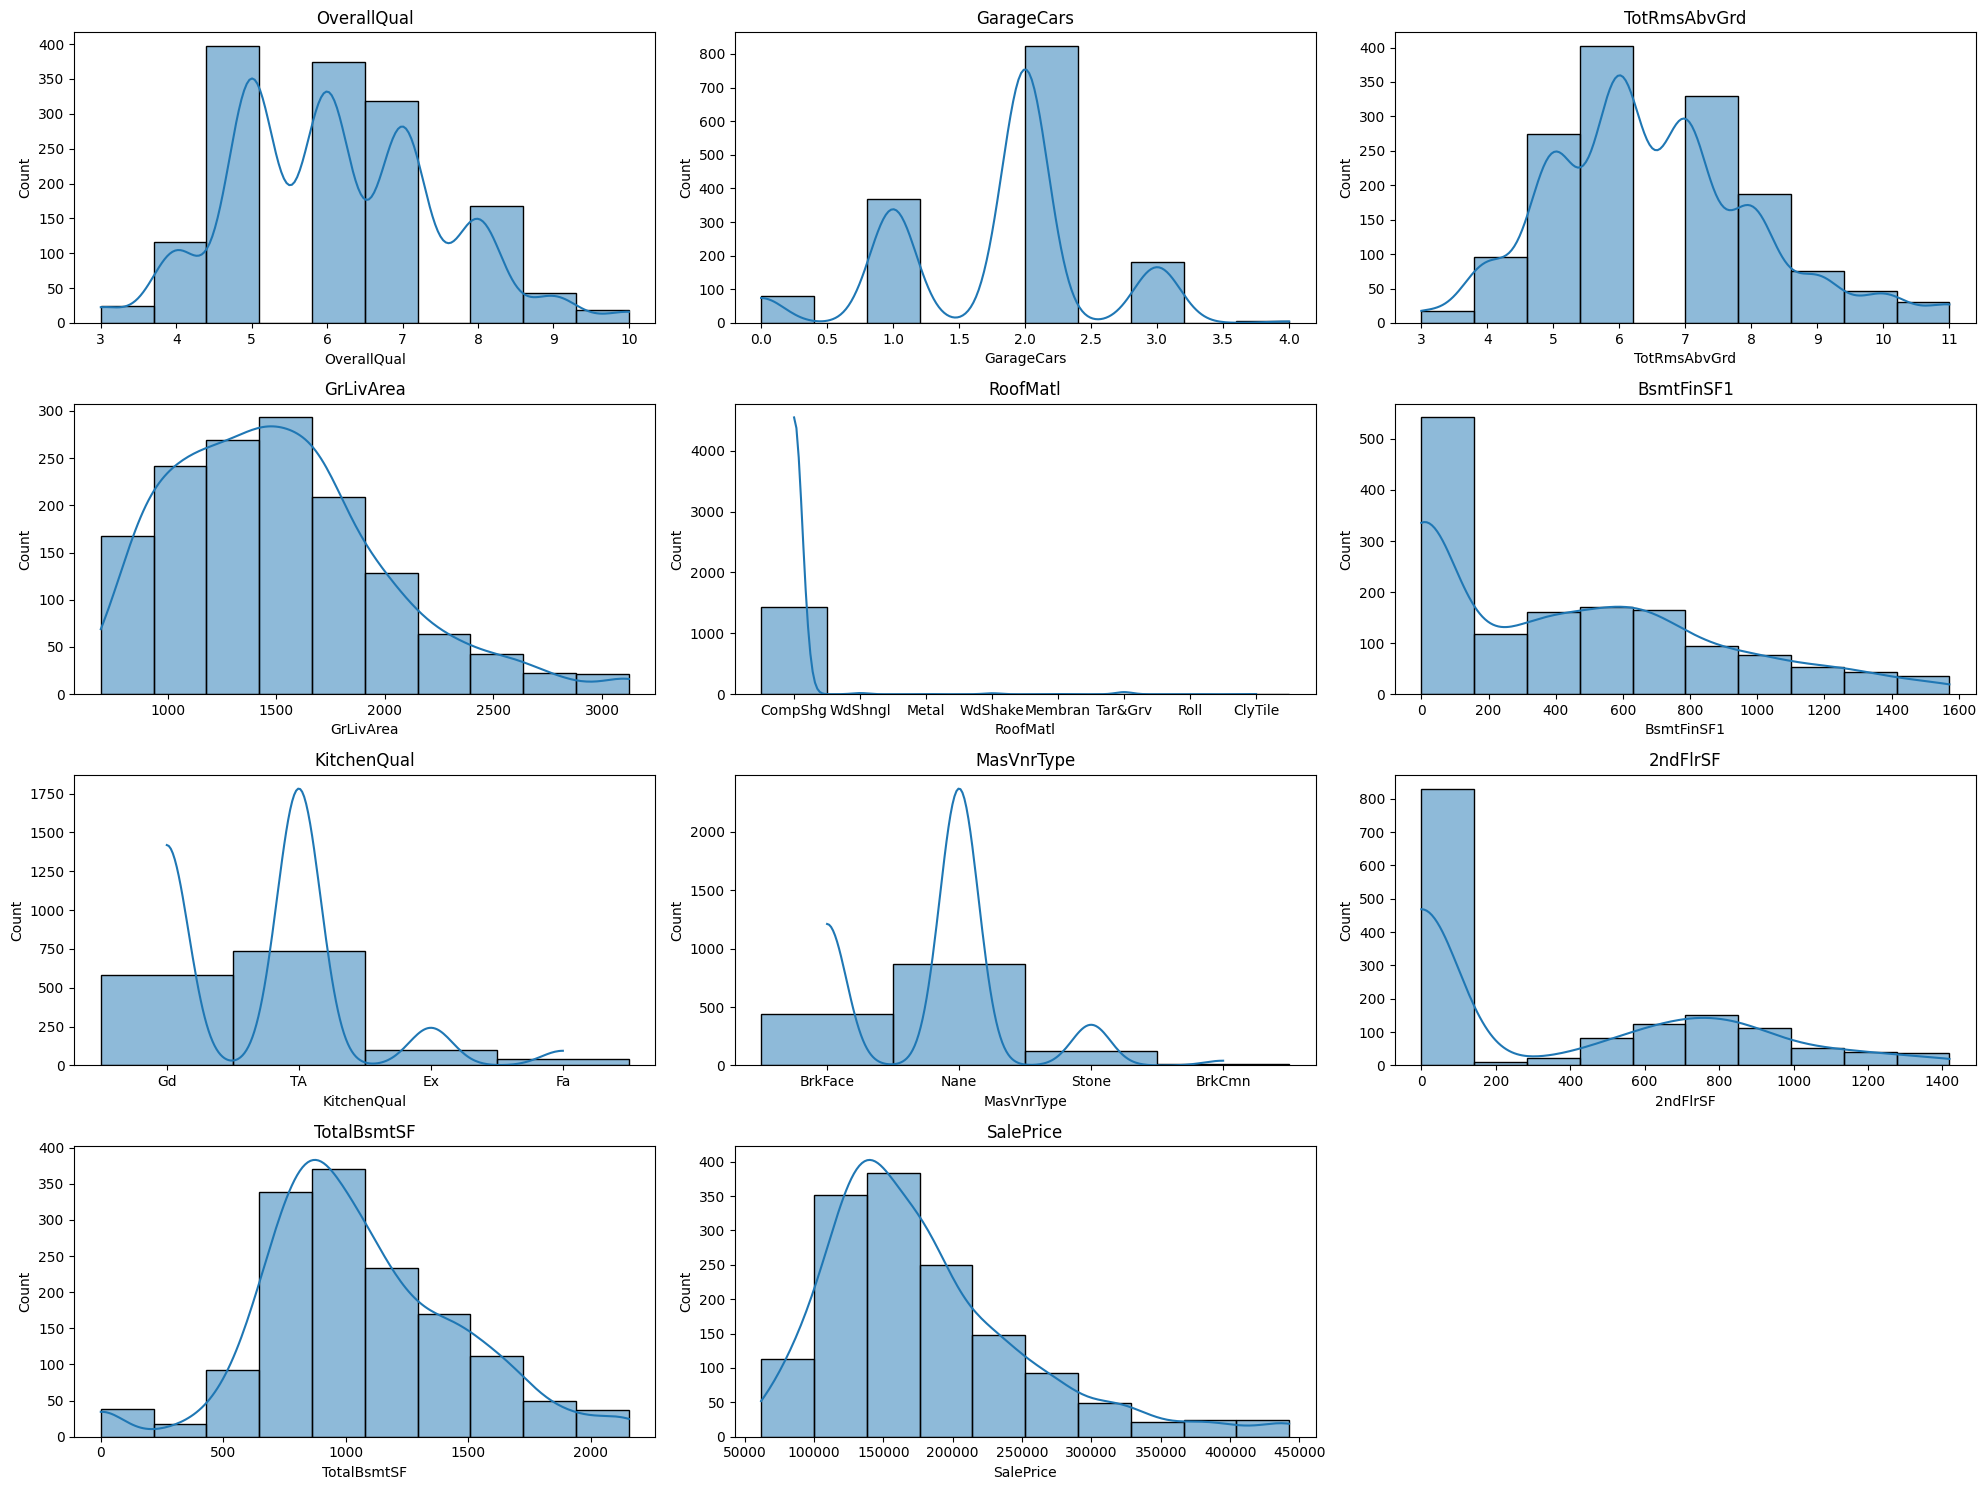

In [16]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True, bins=10)
    plt.title(column)
plt.tight_layout()
plt.show()

## Encoder for categorical values 

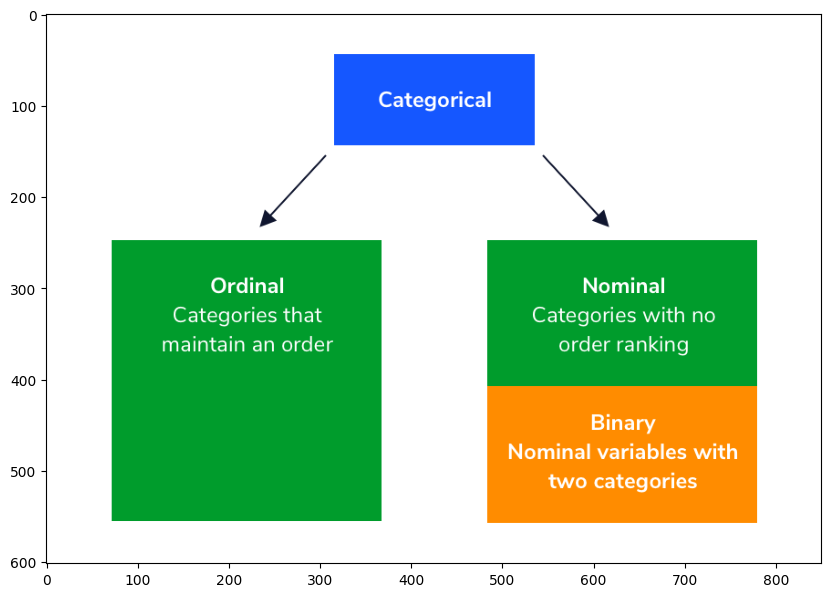

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('documents/Intro_to_variable_types_3.webp')
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

#### Encoder for ordinal columns

In [18]:
df[non_binary_columns].head()

,GarageCars,RoofMatl,KitchenQual,MasVnrType
0,2,CompShg,Gd,BrkFace
1,2,CompShg,TA,Nane
2,2,CompShg,Gd,BrkFace
3,3,CompShg,Gd,Nane
4,3,CompShg,Gd,BrkFace


In [19]:
df['KitchenQual'].value_counts()

KitchenQual
TA    735
Gd    585
Ex    100
Fa     39
Name: count, dtype: int64

In [20]:
ordinal_columns=['GarageCars', 'KitchenQual']


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ordinal_columns:
    df[col] = le.fit_transform( df[col])

### Encoder for categorical values 

In [22]:
df[ordinal_columns].head()

,GarageCars,KitchenQual
0,2,2
1,2,3
2,2,2
3,3,2
4,3,2


## Correlation  

In [23]:
method : {'pearson', 'kendall', 'spearman'}

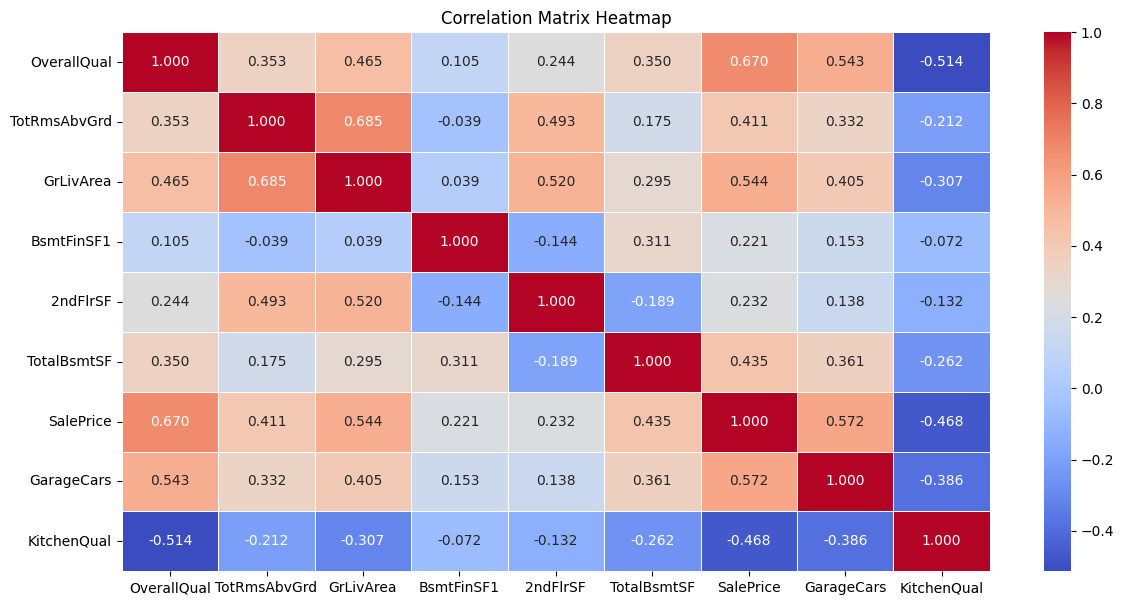

In [24]:
correlation_matrix = df[numerical_columns+ordinal_columns].corr(method='kendall')
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

##  Nominal columns

In [25]:
nominal_columns = [col for col in non_binary_columns if col not in ordinal_columns]


In [26]:
df[nominal_columns].head()

,RoofMatl,MasVnrType
0,CompShg,BrkFace
1,CompShg,Nane
2,CompShg,BrkFace
3,CompShg,Nane
4,CompShg,BrkFace


 ### Visualizing the relationship between a categorical variable and  numerical columns 

In [27]:
numerical_columns_sorted = sorted(numerical_columns)
categorical_columns_sorted = sorted(categorical_columns)
numerical_dropdown = Dropdown(options=numerical_columns_sorted, description='Numerical Column:')
categorical_dropdown = Dropdown(options=categorical_columns_sorted, description='Categorical Column:')


In [28]:
def update_plot(numerical_column, categorical_column):
    data = []
    categories = df[categorical_column].unique().tolist()
    if pd.isna(categories).any():
        categories.append(np.nan)
    for category in categories:
        if pd.isna(category):
            category_name = 'missing'  
            subset = df[pd.isna(df[categorical_column])][numerical_column]
        else:
            category_name = str(category)
            subset = df[df[categorical_column] == category][numerical_column]

        data.append(
            go.Box(
                y=subset,
                name=category_name
            )
        )
    fig = go.Figure(data=data)
    fig.update_layout(title=f'Distribution of {numerical_column} by {categorical_column} (including Missing)')
    fig.show()
interact(update_plot, numerical_column=numerical_dropdown, categorical_column=categorical_dropdown)

interactive(children=(Dropdown(description='Numerical Column:', options=('2ndFlrSF', 'BsmtFinSF1', 'GrLivArea'…

<function __main__.update_plot(numerical_column, categorical_column)>

## One hot coding 

In [29]:
import pandas as pd
df = pd.get_dummies(df, columns=nominal_columns, drop_first=True)


In [30]:
df.head()

,OverallQual,GarageCars,TotRmsAbvGrd,GrLivArea,BsmtFinSF1,KitchenQual,2ndFlrSF,TotalBsmtSF,SalePrice,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_Nane,MasVnrType_Stone
0,7,2,8,1710.0,706.0,2,854.0,856.0,208500.0,True,False,False,False,False,False,False,True,False,False
1,6,2,6,1262.0,978.0,3,0.0,1262.0,181500.0,True,False,False,False,False,False,False,False,True,False
2,7,2,6,1786.0,486.0,2,866.0,920.0,223500.0,True,False,False,False,False,False,False,True,False,False
3,7,3,7,1717.0,216.0,2,756.0,756.0,140000.0,True,False,False,False,False,False,False,False,True,False
4,8,3,9,2198.0,655.0,2,1053.0,1145.0,250000.0,True,False,False,False,False,False,False,True,False,False


## Detection  outliers 

In [31]:
def find_outlier_columns(df, q1_value, q2_value):
    """
    Identify columns in the DataFrame that contain outliers.
    :param df: A pandas DataFrame.
    :return: A list of column names that have outliers.
    """
    outlier_columns = []
    numerical_cols = df.select_dtypes(include=['number']).columns
    # q1_value=0.25
    # q2_value=0.75
    for col in numerical_cols:
        Q1 = df[col].quantile(q1_value)
        Q3 = df[col].quantile(q2_value)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_columns.append(col)
    return outlier_columns

In [32]:
find_outlier_columns(df[numerical_columns], 0.05, 0.99)

[]

In [33]:
def replace_outliers_with_limits(df, lower_quantile=0.01, upper_quantile=0.99):
    numerical_cols = df.select_dtypes(include=['number']).columns
    for col in numerical_cols:
        lower_limit = df[col].quantile(lower_quantile)
        upper_limit = df[col].quantile(upper_quantile)
        
        df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)
    return df

In [34]:
df[numerical_columns]=replace_outliers_with_limits(df[numerical_columns])

## Model training and  prediction

In [35]:
X = df.drop('SalePrice', axis=1)
y = df[["SalePrice"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

### 1. XGBRegressor (XGBoost)

In [36]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

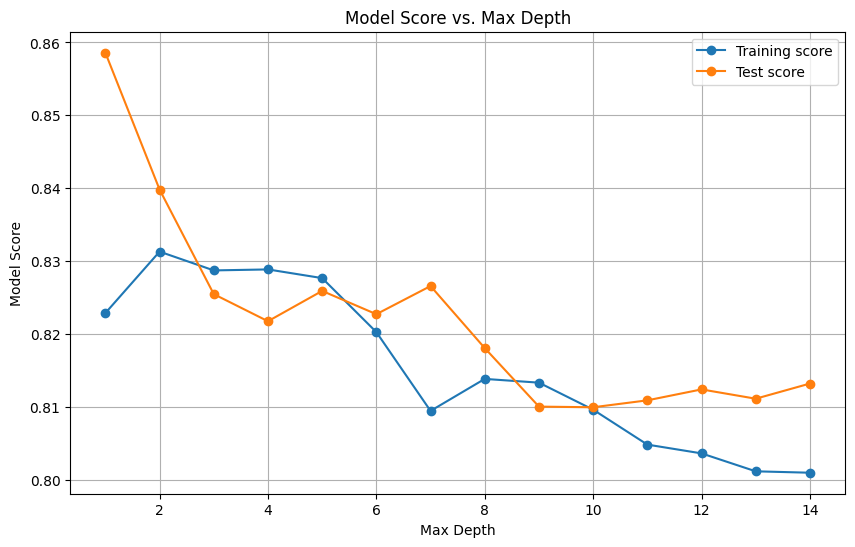

In [37]:
max_depth_range = np.arange(1, 15) 
train_scores, test_scores = [], []
for max_depth in max_depth_range:
    dtree = XGBRegressor(max_depth=max_depth, random_state=99)
    train_score = np.mean(cross_val_score(dtree, X_train, y_train, scoring ='r2', cv=3))
    train_scores.append(train_score)
    test_score = np.mean(cross_val_score(dtree, X_test, y_test, scoring ='r2', cv=3))
    test_scores.append(test_score)
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_scores, label='Training score', marker='o')
plt.plot(max_depth_range, test_scores, label='Test score', marker='o')
plt.title('Model Score vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Model Score')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': np.arange(1, 10),
    'learning_rate': [0.1],
    'subsample': [0.8]
}

In [39]:

xgb_model = XGBRegressor(random_state=99)
xgb_model = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='r2', cv=5, verbose=2, n_jobs=-1)


xgb_model.fit(X_train, y_train)

print("Best parameters:", xgb_model.best_params_)
print("Best score:", xgb_model.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best score: 0.8584916520145403


In [40]:
# Perform cross-validation
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [41]:
# Fit the model to the training set
xgb_model.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=99, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [100, 150], 'subsample': [0.8]},
             scoring='r2', verbose=2)

In [42]:

y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
xgb_train_score = xgb_model.score(X_train, y_train)
xgb_test_score = xgb_model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred_xgb)

In [43]:
print(f"XGBRegressor Cross-Validation Scores: {xgb_cv_scores}")
print(f"XGBRegressor Mean CV R^2 Score: {xgb_cv_scores.mean()}")
print(f"XGBRegressor Train R^2 Score: {xgb_train_score}")
print(f"XGBRegressor Test R^2 Score: {xgb_test_score}")
print(f"XGBRegressor  Test Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBRegressor Test Root Mean Squared Error (RMSE): {np.sqrt(mse_xgb)}")
print(f"XGBRegressor Test Mean Absolute Error  (mae): {mae}")

XGBRegressor Cross-Validation Scores: [0.83365407 0.83638149 0.86980247 0.8515891  0.87114383]
XGBRegressor Mean CV R^2 Score: 0.8525141904859994
XGBRegressor Train R^2 Score: 0.9272834942066173
XGBRegressor Test R^2 Score: 0.8606505356496414
XGBRegressor  Test Mean Squared Error (MSE): 678170611.5737505
XGBRegressor Test Root Mean Squared Error (RMSE): 26041.709075514813
XGBRegressor Test Mean Absolute Error  (mae): 18024.385769563356


## GridSearchCV model has no feature_importances_ mwethod theremore we have to train the model again normal 

In [44]:
xgb_params = {
    'n_estimators': 150,
    'max_depth': 2,
    'learning_rate': 0.1,
    'subsample': 0.8
}

In [45]:
xgb_model = XGBRegressor(random_state=99, **xgb_params)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=99, ...)

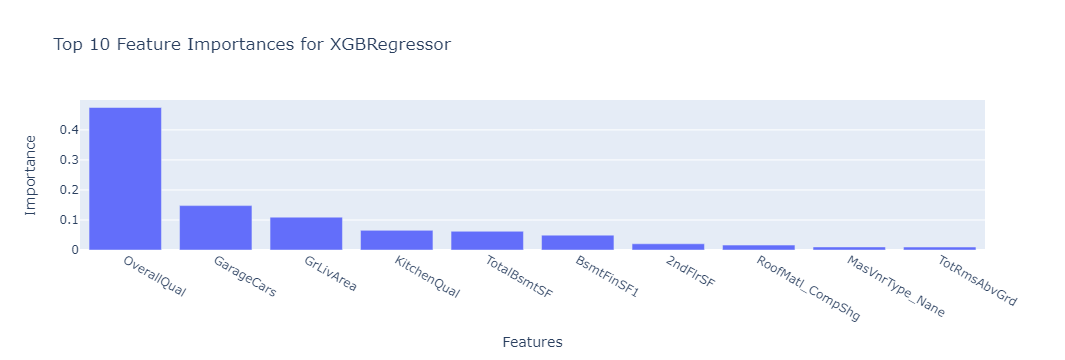

In [46]:
import plotly.express as px
xgb_feature_importances = xgb_model.feature_importances_
xgb_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_feature_importances
}).sort_values(by='Importance', ascending=False)
xgb_importances = xgb_importances[xgb_importances['Importance'] > 0].head(10)
fig = px.bar(xgb_importances, x='Feature', y='Importance', 
             title='Top 10 Feature Importances for XGBRegressor',
             labels={'Feature': 'Features', 'Importance': 'Importance'})

fig.show()

 ### 2 CatBoostRegressor

In [47]:
from catboost import CatBoostRegressor
cat_params = {
    'iterations': 150,
    'depth': 2,
    'learning_rate': 0.1,
    'verbose': False
}

In [48]:
cat_model = CatBoostRegressor(random_state=99, **cat_params)
cat_cv_scores = cross_val_score(cat_model, X_train, y_train, cv=5, scoring='r2')
cat_model.fit(X_train, y_train)

In [49]:
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
cat_model_train_score = cat_model.score(X_train, y_train)
cat_model_test_score = cat_model.score(X_test, y_test)
mse_cat = mean_squared_error(y_test, y_pred_cat)

In [50]:
print(f"CatBoostRegressor Cross-Validation Scores: {cat_cv_scores}")
print(f"CatBoostRegressor Mean CV R^2 Score: {cat_cv_scores.mean()}")
print(f"CatBoostRegressor Train R^2 Score: {cat_model_train_score}")
print(f"CatBoostRegressor Test R^2 Score: {cat_model_test_score}")
print(f"CatBoostRegressor Mean Squared Error (MSE): {mse_cat}")

CatBoostRegressor Cross-Validation Scores: [0.85287694 0.8377608  0.87090334 0.8483435  0.86736772]
CatBoostRegressor Mean CV R^2 Score: 0.8554504592323184
CatBoostRegressor Train R^2 Score: 0.8949911198140097
CatBoostRegressor Test R^2 Score: 0.8519390989736826
CatBoostRegressor Mean Squared Error (MSE): 720566471.2619315


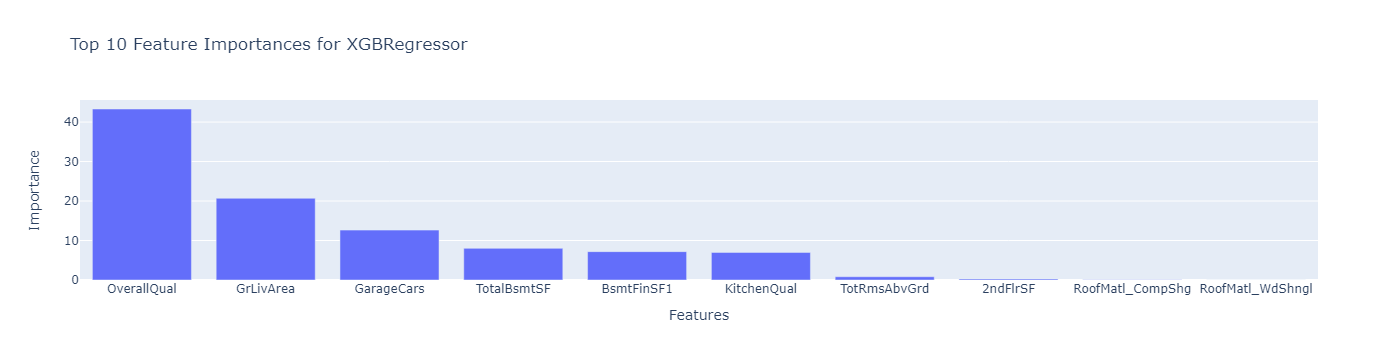

In [51]:
import plotly.express as px
cat_model_feature_importances = cat_model.feature_importances_
cat_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': cat_model_feature_importances
}).sort_values(by='Importance', ascending=False)
cat_importances = cat_importances[cat_importances['Importance'] > 0].head(10)
fig = px.bar(cat_importances, x='Feature', y='Importance', 
             title='Top 10 Feature Importances for XGBRegressor',
             labels={'Feature': 'Features', 'Importance': 'Importance'})

fig.show()

## 2.LGBMRegressor (LightGBM)

In [52]:
from lightgbm import LGBMRegressor

# Hyperparameters for LGBMRegressor
lgb_params = {
    'n_estimators': 150,
    'max_depth': 2,
    'learning_rate': 0.1,
    'subsample': 0.8
}

In [53]:
# Initialize and train the LGBMRegressor
lgb_model = LGBMRegressor(random_state=99, **lgb_params)

In [54]:
# Perform cross-validation
lgb_cv_scores = cross_val_score(lgb_model, X_train, y_train, cv=3, scoring='r2', verbose=0)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 835
[LightGBM] [Info] Number of data points in the train set: 778, number of used features: 11
[LightGBM] [Info] Start training from score 180680.887532
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

  File "C:\Users\habdullayev\Documents\Machine_learning_course\ml_env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [55]:
lgb_model.fit(X_train, y_train)
lgb_train_score = lgb_model.score(X_train, y_train)
lgb_test_score = lgb_model.score(X_test, y_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 1167, number of used features: 12
[LightGBM] [Info] Start training from score 181179.074728
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [56]:

# Output the cross-validation scores
print(f"LGBMRegressor Cross-Validation Scores: {lgb_cv_scores}")
print(f"LGBMRegressor Mean CV R^2 Score: {lgb_cv_scores.mean()}")
print(f"LGBMRegressor Train R^2 Score: {lgb_train_score}")
print(f"LGBMRegressor Test R^2 Score: {lgb_test_score}")
print(f"LGBMRegressor Mean Squared Error (MSE): {mse_cat}")


LGBMRegressor Cross-Validation Scores: [0.81183723 0.85056615 0.86938902]
LGBMRegressor Mean CV R^2 Score: 0.843930801800633
LGBMRegressor Train R^2 Score: 0.8962369926337961
LGBMRegressor Test R^2 Score: 0.8801929034190411
LGBMRegressor Mean Squared Error (MSE): 720566471.2619315


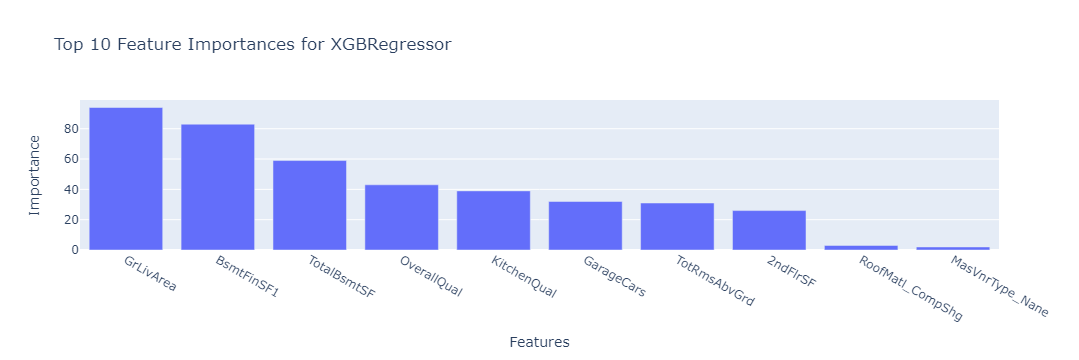

In [57]:
import plotly.express as px
lgb_model_feature_importances = lgb_model.feature_importances_
lgb_model_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lgb_model_feature_importances
}).sort_values(by='Importance', ascending=False)
lgb_model_importances =lgb_model_importances[lgb_model_importances['Importance'] > 0].head(10)
fig = px.bar(lgb_model_importances, x='Feature', y='Importance', 
             title='Top 10 Feature Importances for XGBRegressor',
             labels={'Feature': 'Features', 'Importance': 'Importance'})

fig.show()

In [58]:
print(f"LGBMRegressor Test R^2 Score: {lgb_test_score}")
print(f"Cat_model Test R^2 Score: {cat_model_test_score}")
print(f"XGBRegressor Test R^2 Score: {xgb_test_score}")

LGBMRegressor Test R^2 Score: 0.8801929034190411
Cat_model Test R^2 Score: 0.8519390989736826
XGBRegressor Test R^2 Score: 0.8606505356496414


### Compare with other ML models 

In [59]:
### DecisionTreeRegressor

In [60]:
dtree = DecisionTreeRegressor(random_state=99)
param_grid = {
    'max_depth':  np.arange(3, 10) ,
    'min_samples_leaf': np.arange(1, 20),
}
grid_search = GridSearchCV(dtree, param_grid, cv=3, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 133 candidates, totalling 399 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=99),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             scoring='r2', verbose=1)

In [61]:
# Best model
best_dtree = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 9, 'min_samples_leaf': 11}


In [62]:
y_pred_train = best_dtree.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
r2_train_tree = r2_score(y_train, y_pred_train)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2_train_tree}")

Mean Squared Error: 659864997.990235
R^2 Score: 0.8825596601492752


In [63]:
y_pred = best_dtree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2_tree_train = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2_tree_train}")

Mean Squared Error: 907028512.8797894
R^2 Score: 0.8136251626607742


### Linear model

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
ridge_model = Ridge(alpha=1.0)

In [66]:
ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)

In [67]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2_linear}")

Mean Squared Error (MSE): 688642915.9030391
R-squared (R2): 0.8584987025063358


In [68]:
## Compare all of the model 

In [69]:
print(f"LGBMRegressor Test R^2 Score: {lgb_test_score}")
print(f"Cat_model Test R^2 Score: {cat_model_test_score}")
print(f"XGBRegressor Test R^2 Score: {xgb_test_score}")
print(f"Tree R^2 Score: {r2_tree_train}")
print(f"R-squared (R2): {r2_linear}")

LGBMRegressor Test R^2 Score: 0.8801929034190411
Cat_model Test R^2 Score: 0.8519390989736826
XGBRegressor Test R^2 Score: 0.8606505356496414
Tree R^2 Score: 0.8136251626607742
R-squared (R2): 0.8584987025063358
